In [1]:
#%run -i ~/myLibrary/init.ipynb
from scipy.special   import erfc
from scipy.integrate import cumtrapz
from math import *
from scipy.constants import c
import matplotlib.gridspec as gridspec
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as pl
import pickle, gzip
import matplotlib.pyplot as plt

na = np.array

from scipy.constants import c as clight

import sys, os
BIN = os.path.expanduser("../")
sys.path.append(BIN)
#%run -i emit_model_elastic_scattering.ipynb
#%run -i IBSmodel_GY.ipynb
#%run -i noiseINmodel_FB.ipynb
#%run -i LumiModel_CouplNoiseBoff_2.ipynb

In [2]:
filln = 7334

gamma = 479.6  #450GeV
VRF = 6.0e6    # RF Voltage at flat bottom (in V) #on the 6Dec18 Stef ran the lumimod for dif. VRF values, since for 7035- there were RF voltage reduction steps from 6 to 4MV. We stayed with 4 MV ever since fill 7092.
tauSRxy_s  = np.inf    # damping times due to synchrotron radiation at FB energy (in s) for transverse plane

#for coupling
coupl_coef_FB   = 0.0015    # Linear coupling coefficient for Model in FB
delta_ts_FB = 0.025     # Unperturbed tune split in FB

save_pngs = True
if save_pngs:
    folder_pngs = 'plots_MeasuredModel_CouplNoise_FB'
    if not os.path.exists(folder_pngs):os.makedirs(folder_pngs)
    i_png=0

In [12]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_%d/fill_%d_cycle.pkl.gz'%(filln, filln), 'rb') as fid:
    filln_CycleDict = pickle.load(fid)

#model cases with Coupling, Noise

#no Coupling
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/FlatBottom/fill_%d_model_FB_noCoupl.pkl.gz'%(filln), 'rb') as fid:
    dict_models_noCoupl = pickle.load(fid)          
#Coupling    
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/FlatBottom/fill_%d_model_FB_Coupl.pkl.gz'%(filln), 'rb') as fid:
    dict_models_Coupl = pickle.load(fid)    
#Coupling&Noise    
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/FlatBottom/fill_%d_model_FB_CouplNoise.pkl.gz'%(filln), 'rb') as fid:
    dict_models_CouplNoise = pickle.load(fid)

In [58]:
filln_CycleDict['beam_1']['Injection']['at_end'].keys()

['time_meas', 'emith', 'blength', 'brightness', 'intensity', 'emitv']

In [4]:
dt1=(na(filln_CycleDict['beam_1']['Injection']['at_end']['time_meas'])-na(filln_CycleDict['beam_1']['Injection']['at_start']['time_meas']))/3600
print dt1
dt2=(na(filln_CycleDict['beam_2']['Injection']['at_end']['time_meas'])-na(filln_CycleDict['beam_2']['Injection']['at_start']['time_meas']))/3600
print dt2

[       nan 0.92888885 0.92888885 ... 0.30638889 0.30638889 0.30638889]
[       nan 1.00305564 1.00305564 ... 0.28083335 0.28083335 0.28083335]


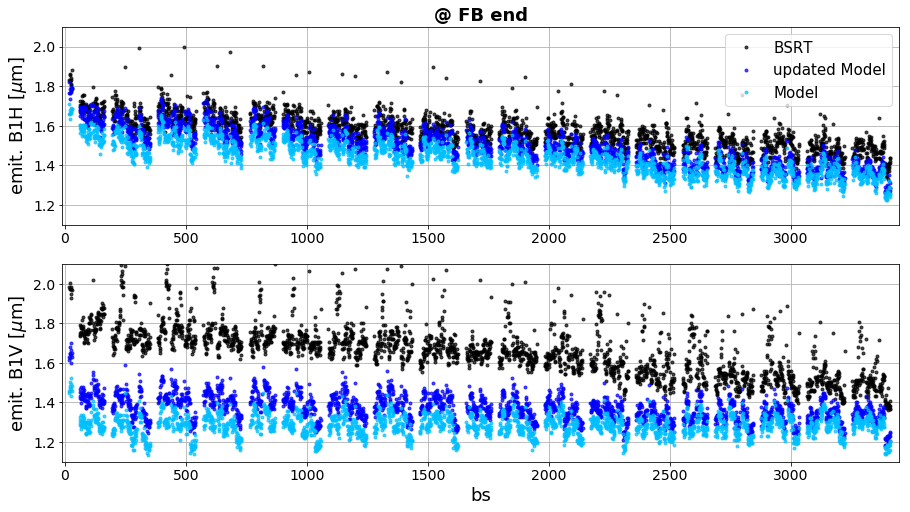

In [13]:
fig1 = plt.figure('B1', figsize=(15,8))
ax_l1 = plt.subplot(211)
ax_l2 = plt.subplot(212, sharex=ax_l1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],filln_CycleDict['beam_1']['Injection']['at_end']['emith'],'.k',alpha=0.7,label='BSRT')
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_CouplNoise['beam_1']['Injection']['at_end']['emith'],'.b',alpha=0.7,label='updated Model')#'Coupl&Noise')
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_noCoupl['beam_1']['Injection']['at_end']['emith'],'.',color='deepskyblue',alpha=0.7,label='Model')
#plt.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_Coupl['beam_1']['Injection']['at_end']['emith'],'.',label='Coupl.')
ax_l1.set_ylim(1.1, 2.1)
plt.xlim(-10, 3450)
#ax_l1.set_xlabel('bs', fontsize=18)
ax_l1.set_ylabel('emit. B1H [$\mu$m]', fontsize=18)
ax_l1.legend(loc='upper right', fontsize=15, numpoints=1)
ax_l1.grid('on')
ax_l1.set_title('@ FB end', fontsize=18, fontweight='bold')
ax_l1.xaxis.set_tick_params(labelsize=14)
ax_l1.yaxis.set_tick_params(labelsize=14)

ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],filln_CycleDict['beam_1']['Injection']['at_end']['emitv'],'.k',alpha=0.7,label='BSRT')
ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv'],'.b',alpha=0.7,label='updated Model')#'Coupl&Noise')
ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv'],'.',color='deepskyblue',alpha=0.7,label='Model')
#ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_Coupl['beam_1']['Injection']['at_end']['emitv'],'.',label='Coupl.')
ax_l2.set_ylim(1.1, 2.1)
plt.xlim(-10, 3450)
ax_l2.set_xlabel('bs', fontsize=18)
ax_l2.set_ylabel('emit. B1V [$\mu$m]', fontsize=18)
ax_l2.grid('on')
#ax_l2.legend(loc='upper right', fontsize=14, numpoints=1)
ax_l2.xaxis.set_tick_params(labelsize=14)
ax_l2.yaxis.set_tick_params(labelsize=14)

if save_pngs: fig1.savefig(folder_pngs+'/fill_%d_B1emitFB'%(filln), dpi=150); 
pl.show()  

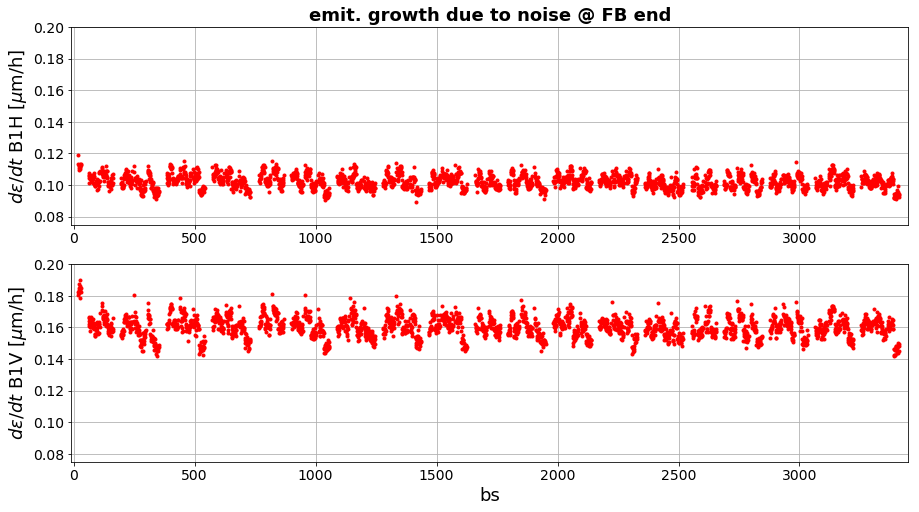

In [66]:
fig1 = plt.figure('B1', figsize=(15,8))
ax_l1 = plt.subplot(211)
ax_l2 = plt.subplot(212, sharex=ax_l1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

#ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],(filln_CycleDict['beam_1']['Injection']['at_end']['emith']-dict_models_CouplNoise['beam_1']['Injection']['at_end']['emith'])/dt1,'.',color='grey')
#ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],(filln_CycleDict['beam_1']['Injection']['at_end']['emith']-dict_models_noCoupl['beam_1']['Injection']['at_end']['emith'])/dt2,'.',color='k')
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],(dict_models_CouplNoise['beam_1']['Injection']['at_end']['emith']-dict_models_noCoupl['beam_1']['Injection']['at_end']['emith'])/dt1,'.',color='r')

ax_l1.set_ylim(0.075,0.2)
plt.xlim(-10, 3450)
#ax_l1.set_xlabel('bs', fontsize=18)
ax_l1.set_ylabel('$d\epsilon/dt$ B1H [$\mu$m/h]', fontsize=18)
#ax_l1.legend(loc='upper right', fontsize=15, numpoints=1)
ax_l1.grid('on')
ax_l1.set_title('emit. growth due to noise @ FB end', fontsize=18, fontweight='bold')
ax_l1.xaxis.set_tick_params(labelsize=14)
ax_l1.yaxis.set_tick_params(labelsize=14)

#ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],(filln_CycleDict['beam_1']['Injection']['at_end']['emitv']-dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv'])/dt2,'.',color='grey')
#ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],(filln_CycleDict['beam_1']['Injection']['at_end']['emitv']-dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv'])/dt2,'.',color='k')
ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],(dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv']-dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv'])/dt1,'.',color='r')

ax_l2.set_ylim(0.075,0.2)
#ax_l2.set_ylim(0.115, 0.12)
plt.xlim(-10, 3450)
ax_l2.set_xlabel('bs', fontsize=18)
ax_l2.set_ylabel('$d\epsilon/dt$ B1V [$\mu$m/h]', fontsize=18)
ax_l2.grid('on')
#ax_l2.legend(loc='upper right', fontsize=14, numpoints=1)
ax_l2.xaxis.set_tick_params(labelsize=14)
ax_l2.yaxis.set_tick_params(labelsize=14)

if save_pngs: fig1.savefig(folder_pngs+'/fill_%d_B1dedtFB'%(filln), dpi=150); 
pl.show()  

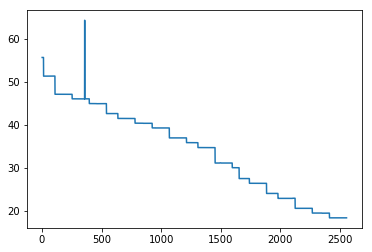

In [17]:
plt.plot(dt1*60)

In [137]:
print np.nanmean(((dict_models_CouplNoise['beam_1']['Injection']['at_end']['emith']-dict_models_noCoupl['beam_1']['Injection']['at_end']['emith'])/dt2)[0:2000])
print np.nanmean(((dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv']-dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv'])/dt2)[360:2000])

0.09932216580723224
0.16432686934973798


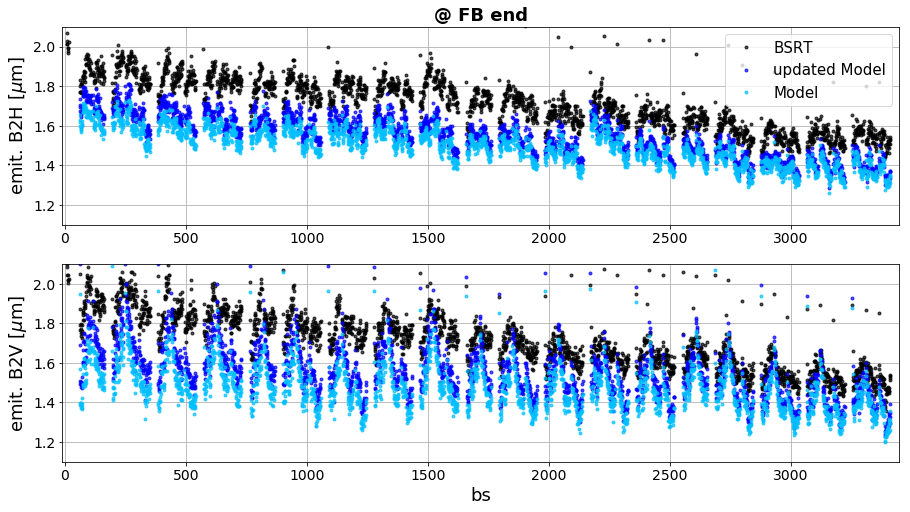

In [67]:
fig2 = plt.figure('B2', figsize=(15,8))
ax_l1 = plt.subplot(211)
ax_l2 = plt.subplot(212, sharex=ax_l1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

ax_l1.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],filln_CycleDict['beam_2']['Injection']['at_end']['emith'],'.k',alpha=0.7,label='BSRT')
ax_l1.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_CouplNoise['beam_2']['Injection']['at_end']['emith'],'.b',alpha=0.7,label='updated Model')#'Coupl&Noise')
ax_l1.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_noCoupl['beam_2']['Injection']['at_end']['emith'],'.',color='deepskyblue',alpha=0.7,label='Model')
#plt.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_Coupl['beam_1']['Injection']['at_end']['emith'],'.',label='Coupl.')
ax_l1.set_ylim(1.1, 2.1)
plt.xlim(-10, 3450)
#ax_l1.set_xlabel('bs', fontsize=18)
ax_l1.set_ylabel('emit. B2H [$\mu$m]', fontsize=18)
ax_l1.legend(loc='upper right', fontsize=15, numpoints=1)
ax_l1.grid('on')
ax_l1.set_title('@ FB end', fontsize=18, fontweight='bold')
ax_l1.xaxis.set_tick_params(labelsize=14)
ax_l1.yaxis.set_tick_params(labelsize=14)

ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],filln_CycleDict['beam_2']['Injection']['at_end']['emitv'],'.k',alpha=0.7,label='BSRT')
ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_CouplNoise['beam_2']['Injection']['at_end']['emitv'],'.b',alpha=0.7,label='updated Model')#'Coupl&Noise')
ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_noCoupl['beam_2']['Injection']['at_end']['emitv'],'.',color='deepskyblue',alpha=0.7,label='Model')
#ax_l2.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_Coupl['beam_1']['Injection']['at_end']['emitv'],'.',label='Coupl.')
ax_l2.set_ylim(1.1, 2.1)
plt.xlim(-10, 3450)
ax_l2.set_xlabel('bs', fontsize=18)
ax_l2.set_ylabel('emit. B2V [$\mu$m]', fontsize=18)
ax_l2.grid('on')
#ax_l2.legend(loc='upper right', fontsize=14, numpoints=1)
ax_l2.xaxis.set_tick_params(labelsize=14)
ax_l2.yaxis.set_tick_params(labelsize=14)

if save_pngs: fig2.savefig(folder_pngs+'/fill_%d_B2emitFB'%(filln), dpi=150); 
pl.show()  

In [59]:
#taking only the first bunches for better statistics, since the lqast bunches stay only for a few minutes at FB
bunch_i=20
bunch_f=3600

print '     ~~~B1H~~~'
print 'BSRT:       ',round(np.nanmean(filln_CycleDict['beam_1']['Injection']['at_end']['emith'][bunch_i:bunch_f]),4)
mplaa=dict_models_noCoupl['beam_1']['Injection']['at_end']['emith'][bunch_i:bunch_f]
mplaaa=np.isfinite(dict_models_noCoupl['beam_1']['Injection']['at_end']['emith'][bunch_i:bunch_f])
print 'no Coupl.:  ',round(np.nanmean(mplaa[mplaaa]),4)
print 'Coupl.:     ',round(np.nanmean(dict_models_Coupl['beam_1']['Injection']['at_end']['emith'][bunch_i:bunch_f]),4)
print 'Coupl&Noise:',round(np.nanmean(dict_models_CouplNoise['beam_1']['Injection']['at_end']['emith'][bunch_i:bunch_f]),4)
print '     ~~~B1V~~~'
print 'BSRT:       ',round(np.nanmean(filln_CycleDict['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f]),4)
mplaa=dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f]
mplaaa=np.isfinite(dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f])
print 'no Coupl.:  ',round(np.nanmean(mplaa[mplaaa]),4)
mploo=dict_models_Coupl['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f]
mplooo=np.isfinite(dict_models_Coupl['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f])
print 'Coupl.:     ',round(np.nanmean(mploo[mplooo]),4)
mplee=dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f]
mpleee=np.isfinite(dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv'][bunch_i:bunch_f])
print 'Coupl&Noise:',round(np.nanmean(mplee[mpleee]),4)

print '     ~~~B2H~~~'
print 'BSRT:       ',round(np.nanmean(filln_CycleDict['beam_2']['Injection']['at_end']['emith'][bunch_i:bunch_f]),4)
mplaa=dict_models_noCoupl['beam_2']['Injection']['at_end']['emith'][bunch_i:bunch_f]
mplaaa=np.isfinite(dict_models_noCoupl['beam_2']['Injection']['at_end']['emith'][bunch_i:bunch_f])
print 'no Coupl.:  ',round(np.nanmean(mplaa[mplaaa]),4)
print 'Coupl.:     ',round(np.nanmean(dict_models_Coupl['beam_2']['Injection']['at_end']['emith'][bunch_i:bunch_f]),4)
print 'Coupl&Noise:',round(np.nanmean(dict_models_CouplNoise['beam_2']['Injection']['at_end']['emith'][bunch_i:bunch_f]),4)
print '     ~~~B2V~~~'
print 'BSRT:       ',round(np.nanmean(filln_CycleDict['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f]),4)
mplaa=dict_models_noCoupl['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f]
mplaaa=np.isfinite(dict_models_noCoupl['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f])
print 'no Coupl.:  ',round(np.nanmean(mplaa[mplaaa]),4)
mploo=dict_models_Coupl['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f]
mplooo=np.isfinite(dict_models_Coupl['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f])
print 'Coupl.:     ',round(np.nanmean(mploo[mplooo]),4)
mplee=dict_models_CouplNoise['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f]
mpleee=np.isfinite(dict_models_CouplNoise['beam_2']['Injection']['at_end']['emitv'][bunch_i:bunch_f])
print 'Coupl&Noise:',round(np.nanmean(mplee[mpleee]),4)

     ~~~B1H~~~
BSRT:        1.5721
no Coupl.:   1.4379
Coupl.:      1.4376
Coupl&Noise: 1.4961
     ~~~B1V~~~
BSRT:        1.6569
no Coupl.:   1.282
Coupl.:      1.2822
Coupl&Noise: 1.3732
     ~~~B2H~~~
BSRT:        1.717
no Coupl.:   1.4972
Coupl.:      1.4972
Coupl&Noise: 1.5488
     ~~~B2V~~~
BSRT:        1.7163
no Coupl.:   1.473
Coupl.:      1.4726
Coupl&Noise: 1.5488


(0.9995, 1.0005)

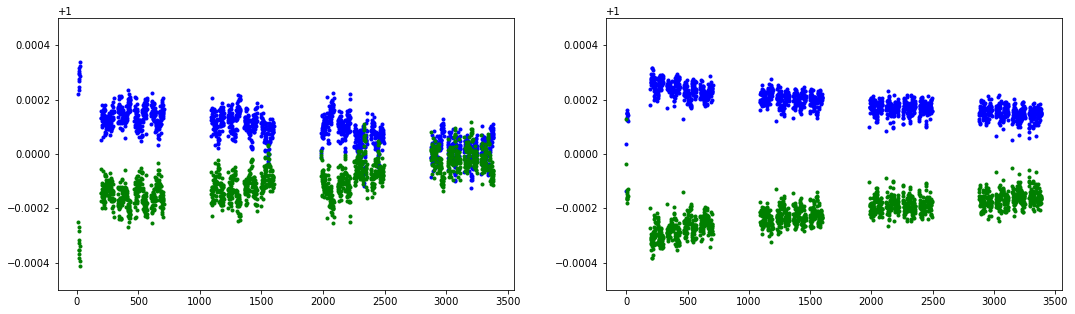

In [40]:
fig11= plt.figure('B1 and B2 ratios', figsize=(18,5))
ax_l1 = plt.subplot(121)
ax_l2 = plt.subplot(122)

#B1
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_noCoupl['beam_1']['Injection']['at_end']['emith']/dict_models_Coupl['beam_1']['Injection']['at_end']['emith'],'.b')
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv']/dict_models_Coupl['beam_1']['Injection']['at_end']['emitv'],'.g')
#B2
ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_noCoupl['beam_2']['Injection']['at_end']['emith']/dict_models_Coupl['beam_2']['Injection']['at_end']['emith'],'.b')
ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_noCoupl['beam_2']['Injection']['at_end']['emitv']/dict_models_Coupl['beam_2']['Injection']['at_end']['emitv'],'.g')

ax_l1.set_ylim(0.9995, 1.0005)
ax_l2.set_ylim(0.9995, 1.0005)

(0.96, 0.99)

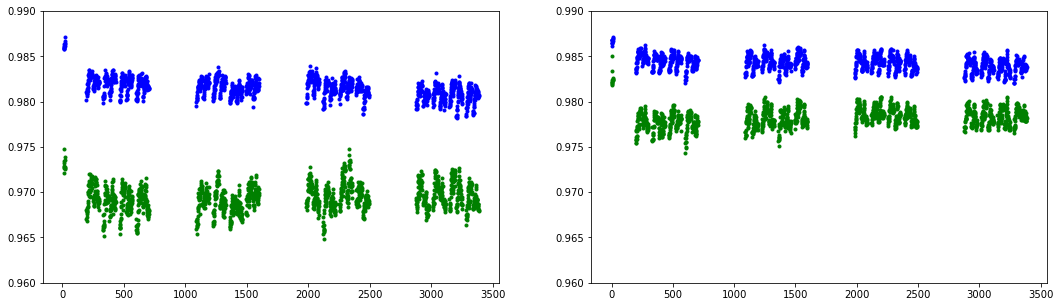

In [41]:
fig22= plt.figure('B1 and B2 ratioss', figsize=(18,5))
ax_l1 = plt.subplot(121)
ax_l2 = plt.subplot(122)
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_noCoupl['beam_1']['Injection']['at_end']['emith']/dict_models_CouplNoise['beam_1']['Injection']['at_end']['emith'],'.b')
ax_l1.plot(filln_CycleDict['beam_1']['Injection']['filled_slots'],dict_models_noCoupl['beam_1']['Injection']['at_end']['emitv']/dict_models_CouplNoise['beam_1']['Injection']['at_end']['emitv'],'.g')
ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_noCoupl['beam_2']['Injection']['at_end']['emith']/dict_models_CouplNoise['beam_2']['Injection']['at_end']['emith'],'.b')
ax_l2.plot(filln_CycleDict['beam_2']['Injection']['filled_slots'],dict_models_noCoupl['beam_2']['Injection']['at_end']['emitv']/dict_models_CouplNoise['beam_2']['Injection']['at_end']['emitv'],'.g')

ax_l1.set_ylim(0.96, 0.99)
ax_l2.set_ylim(0.96, 0.99)